# IN THE NAME OF GOD 

*Artificial intelligence course group*
Academic year 1401  in Gilan University

**professor's name :**
Amir Hossein Tabatabai






**Group members:**

1.Saba Babaei 

2.Fateme Babakhani

3.Sina Peyman

4.Mohammad Mahdi Shafighy


## Artificial intelligence project title: Telegram chat-bot

یادگیری پردازش زبان طبیعی 


# NLP 

In [43]:
import tensorflow as tf 
import tensorflow.keras as keras
import tensorflow.keras.preprocessing as preprocessing

Data Preprocess

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
data_frame1 = pd.read_csv("/content/1_1_align.csv")
print(data_frame1.shape)
data_frame1.head()

(1952, 12)


,Annotator A ID,Annotator B ID,Parition ID,Corpora ID,Sentence ID,Text,Annotator A Text,Annotator B Text,Length,Error,Alignment Score,Agreement
0,1,7.0,2.0,1.0,6507.0,What advantage is there in booking directly wi...,What advantage is there in booking directly wi...,What advantage is there in booking directly wi...,242.0,152.0,0.371901,0.0
1,1,7.0,2.0,1.0,6508.0,"Hi, Could someone please confirm if CX 884 - H...","[Hi, ]Could someone please confirm if CX 884 -...","Hi, Could someone please confirm if CX 884 - H...",230.0,134.0,0.417391,0.0
2,1,7.0,2.0,1.0,6509.0,I will be transiting Dubai soon en route to Oz...,[I will be transiting Dubai soon en route to O...,I will be transiting Dubai soon en route to Oz...,448.0,175.0,0.609375,1.0
3,1,7.0,2.0,1.0,6514.0,Does anyone know where I'd find estimated pric...,Does anyone know where I'd find estimated pric...,Does anyone know where I'd find estimated pric...,274.0,76.0,0.722628,1.0
4,1,7.0,2.0,1.0,6518.0,It's from BA and finds the cheapest BA flight ...,It's from BA and finds the cheapest BA flight ...,It's from BA and finds the cheapest BA flight ...,89.0,0.0,1.000000,1.0


# Start Train & Test datas

In [5]:
sentences_1 = data_frame1["Text"].to_numpy() # step word2vec
labels_1 = data_frame1["Agreement"].to_numpy()
print(labels_1)

[ 0.  0.  1. ... nan nan nan]


In [9]:
test_split_percent = 0.1

data_length = len(sentences_1)
length_of_trainSet = int((1-test_split_percent)*data_length)
print(data_length)
print(length_of_trainSet)
train_sentences = sentences_1[0 : length_of_trainSet]
test_sentences = sentences_1[length_of_trainSet : ]
# print(test_sentences)
print(len(test_sentences))
train_labels = labels_1[0 : length_of_trainSet]
test_labels = labels_1[length_of_trainSet : ]

1952
1756
196


# Add Parameters

In [10]:
# maximum word
vocab_size = 10000 
max_sentence_length = 100  
# to normalize datasets... number of sentence -> (0, 100)

truncating_0 = 'post'
padding_0 = 'post'
oov_tokens_0 = '@:)'


# k-fold Train & Test 
we have use **Tokenizer & padding** for ordered and resizabling data frame

In [13]:
tokenizer_0 = preprocessing.text.Tokenizer(num_words=vocab_size,
                                oov_token = oov_tokens_0)
tokenizer_0.fit_on_texts(train_sentences)
# print(tokenizer_0)
word_index = tokenizer_0.word_index
print(word_index)

{'@:)': 1, 'the': 2, 'to': 3, 'i': 4, 'and': 5, 'a': 6, 'in': 7, 'on': 8, 'for': 9, 'is': 10, 'of': 11, 'have': 12, 'my': 13, 'with': 14, 'that': 15, 'from': 16, 'it': 17, 'we': 18, 'flight': 19, 'this': 20, 'was': 21, 'be': 22, 'at': 23, 'but': 24, 'not': 25, 'they': 26, 'are': 27, 'if': 28, 'you': 29, 'as': 30, 'me': 31, 'or': 32, 'will': 33, 'so': 34, 'any': 35, 'would': 36, 'can': 37, 'am': 38, 'just': 39, 'flights': 40, 'anyone': 41, 'an': 42, 'had': 43, 'there': 44, 'time': 45, 'thanks': 46, 'do': 47, 'our': 48, 'all': 49, 'when': 50, 'has': 51, 'them': 52, 'get': 53, 'one': 54, 'what': 55, 'were': 56, 'flying': 57, 'out': 58, 'know': 59, 'booked': 60, 'by': 61, 'no': 62, '2': 63, 'airlines': 64, 'us': 65, 'which': 66, "i'm": 67, 'seats': 68, 'air': 69, 'hi': 70, 'airport': 71, 'about': 72, 'back': 73, 'up': 74, 'through': 75, 'their': 76, 'only': 77, 'airline': 78, 'been': 79, 'check': 80, 'ticket': 81, 'then': 82, 'seat': 83, 'travel': 84, 'before': 85, 'some': 86, 'luggage': 8

new 1

In [15]:
train_sequences = tokenizer_0.texts_to_sequences(train_sentences)
# print(train_sequences)
train_padded = preprocessing.sequence.pad_sequences(
    train_sequences,
    maxlen=max_sentence_length,
    padding=padding_0,
    truncating=truncating_0
)

new 2

In [16]:
test_sequences = tokenizer_0.texts_to_sequences(test_sentences[:-5])
# print(train_sequences)
test_padded = preprocessing.sequence.pad_sequences(
    test_sequences,
    maxlen=max_sentence_length,
    padding=padding_0,
    truncating=truncating_0
)

# What is Tokenizer?

How worked fit_on_texts?

Example 1)

In [17]:
My_text = [
    "my name is mahdi",
    "your name is mohammad",
    "how old are you?",
    "I am from Iran, where are you from?"
]
tokenizer1 = preprocessing.text.Tokenizer(num_words=100,
                                          oov_token="@:)")
tokenizer1.fit_on_texts(My_text)

wi = tokenizer1.word_index
print(wi)

{'@:)': 1, 'name': 2, 'is': 3, 'are': 4, 'you': 5, 'from': 6, 'my': 7, 'mahdi': 8, 'your': 9, 'mohammad': 10, 'how': 11, 'old': 12, 'i': 13, 'am': 14, 'iran': 15, 'where': 16}


In [ ]:
# My_text.append("Where are you from")
# print(My_text)

['my name is mahdi', 'your name is mohammad', 'how old are you', 'Where are you from']


In [ ]:
My_sequences = tokenizer1.texts_to_sequences(My_text)
print(My_sequences)

[[7, 2, 3, 8], [9, 2, 3, 10], [11, 12, 4, 5], [13, 14, 6, 15, 16, 4, 5, 6]]


In [ ]:
padding = preprocessing.sequence.pad_sequences(My_sequences,
                      maxlen=5, padding='pre', truncating='post')
print(padding)

[[ 0  7  2  3  8]
 [ 0  9  2  3 10]
 [ 0 11 12  4  5]
 [13 14  6 15 16]]


# Continue Project ( Plot Design)


In [29]:
def plot_design(histo):
  epochs = range(1, len(histo.history['loss'])+1)

  plt.plot(epochs, histo.history['loss'],'red')
  plt.xlabel('Epochs') # Epochs => T
  plt.plot(epochs, histo.history['val_loss'],'blue')
  plt.ylabel('Loss')
  plt.legend(['Training Loss', 'Validation Loss'])
  plt.show()

  plt.plot(epochs, histo.history['accuracy'],'red')
  plt.xlabel('Epochs')
  plt.plot(epochs, histo.history['val_accuracy'], 'blue')
  plt.ylabel('Accuracy')
  plt.legend(['Training Accuracy', 'Validation Accuracy'])
  plt.show()



[ 10 الگوریتم برتر یادگیری عمیق](https://hamruyesh.com/deep-learning-algorithm-guide/)

[RNN شبکه عصبی بازگشتی](https://howsam.org/recurrent-neural-network/)


**1. Simple RNN**

**2. LSTM (Long short-Term Memory)** *

**3. GRU (Gated Recurrent Unit)**

[Word2vec](https://fa.wikipedia.org/wiki/Word2vec)

[Useing from Normal distribution Delete noize data](https://www.google.com/url?sa=i&url=https%3A%2F%2Fwww.isixsigma.com%2Fdictionary%2Fnormal-distribution%2F&psig=AOvVaw0bk_HK61nWkGp3t4XX2iN5&ust=1673454363260000&source=images&cd=vfe&ved=0CBAQjRxqFwoTCJjOvLq1vfwCFQAAAAAdAAAAABAD)

# Models

keras  

Embedding 

GlobalAveragePooling1D

Dense(x2) , activation=keras.activations.relu or softmax

compile

In [25]:
model_E = keras.Sequential()
# The first Layer in Model
model_E.add(
    keras.layers.Embedding(
    vocab_size,          # 10000
    16,                  # nuber of output features 
    input_length=max_sentence_length 
    )
)
# The Second Layer in Model
model_E.add(keras.layers.GlobalAveragePooling1D())
model_E.add(keras.layers.Dense(
    20,
    activation=keras.activations.relu ))
model_E.add(keras.layers.Dense(
    2, 
    activation = keras.activations.sigmoid ))

# The output Layer in model
model_E.compile(
    optimizer = keras.optimizers.Adam(learning_rate=0.001),
    loss = keras.losses.sparse_categorical_crossentropy,
    metrics = ['accuracy']
    )

In [26]:
model_E.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 100, 16)           160000    
                                                                 
 global_average_pooling1d_5   (None, 16)               0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dense_10 (Dense)            (None, 20)                340       
                                                                 
 dense_11 (Dense)            (None, 2)                 42        
                                                                 
Total params: 160,382
Trainable params: 160,382
Non-trainable params: 0
_________________________________________________________________


# Create a sample Model 

In [28]:
history = model_E.fit(
    train_padded,
    train_labels,
    validation_split = 0.1,
    epochs = 5
    )

Epoch 1/5
50/50 [==============================] - 2s 9ms/step - loss: 0.6672 - accuracy: 0.6766 - val_loss: 0.6054 - val_accuracy: 0.7898
Epoch 2/5
50/50 [==============================] - 0s 6ms/step - loss: 0.6179 - accuracy: 0.6956 - val_loss: 0.5381 - val_accuracy: 0.7898
Epoch 3/5
50/50 [==============================] - 0s 6ms/step - loss: 0.6001 - accuracy: 0.6956 - val_loss: 0.5350 - val_accuracy: 0.7898
Epoch 4/5
50/50 [==============================] - 0s 6ms/step - loss: 0.5908 - accuracy: 0.6956 - val_loss: 0.5333 - val_accuracy: 0.7898
Epoch 5/5
50/50 [==============================] - 0s 6ms/step - loss: 0.5762 - accuracy: 0.6981 - val_loss: 0.5436 - val_accuracy: 0.7727


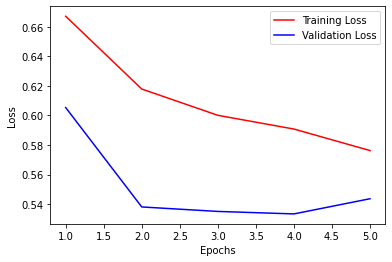

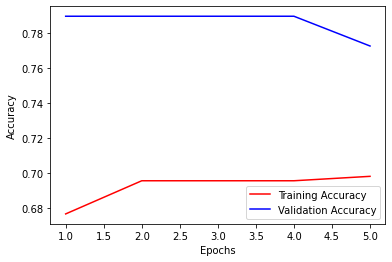

In [30]:
plot_design(history)

# Test Data


# RNN Model
**RNN Structure**

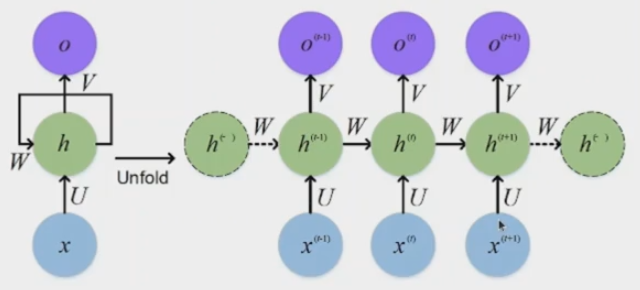

**Simple RNN** >> keras.layers.SimpleRNN

**LSTM (long short-Term Memory)** >> keras.layers.LSTM

**GRU (Gated Recurrent Unit)** >> keras.layers.GRU

In [31]:
model_R = keras.Sequential()
model_R.add(keras.layers.Embedding(
    vocab_size,
    16,
    input_length=max_sentence_length))
# model_R.add(keras.layers.GRU(40,return_sequences=False))
model_R.add(keras.layers.Bidirectional(keras.layers.GRU(20)))
model_R.add(keras.layers.Dense(
    20,
    activation = keras.activations.relu))
model_R.add(keras.layers.Dense(
    2,
    activation = keras.activations.softmax))

model_R.compile(
    optimizer = keras.optimizers.Adam(learning_rate=0.001),
    loss = keras.losses.sparse_categorical_crossentropy,
    metrics = ['accuracy']
    )

In [33]:
history_2 = model_R.fit(
    train_padded,
    train_labels,
    validation_split = 0.1,
    epochs = 5
    )

Epoch 1/5
50/50 [==============================] - 9s 88ms/step - loss: 0.6304 - accuracy: 0.6741 - val_loss: 0.5224 - val_accuracy: 0.7898
Epoch 2/5
50/50 [==============================] - 4s 75ms/step - loss: 0.5955 - accuracy: 0.6956 - val_loss: 0.5364 - val_accuracy: 0.7898
Epoch 3/5
50/50 [==============================] - 4s 76ms/step - loss: 0.5434 - accuracy: 0.7127 - val_loss: 0.6030 - val_accuracy: 0.6250
Epoch 4/5
50/50 [==============================] - 4s 76ms/step - loss: 0.4537 - accuracy: 0.7816 - val_loss: 0.7418 - val_accuracy: 0.6250
Epoch 5/5
50/50 [==============================] - 4s 72ms/step - loss: 0.3948 - accuracy: 0.7962 - val_loss: 0.8716 - val_accuracy: 0.5852


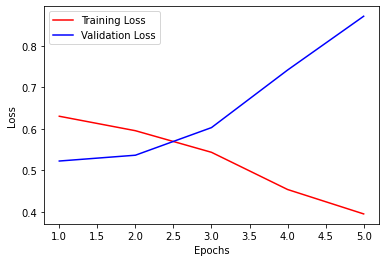

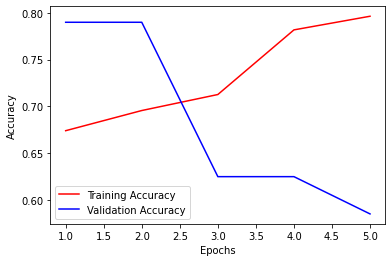

In [34]:
plot_design(history_2)

# Test Data

In [36]:
# print(test_padded)
# print(test_labels[:-5])
model_R.evaluate(test_padded, test_labels[:-5])

6/6 [==============================] - 0s 28ms/step - loss: 0.8336 - accuracy: 0.6073


[0.8335716724395752, 0.6073298454284668]

In [37]:
data_frame2 = pd.read_csv("/content/8_4_align.csv")
# print(data_frame1.shape)
test_sentence = data_frame2.head(2)
# print(test_sentence)

In [39]:
sentences_2 = test_sentence["Text"].to_numpy()
labels_2 = test_sentence["Agreement"].to_numpy()
# print(sentences_2)

In [40]:
tokenizer_2 = preprocessing.text.Tokenizer(num_words=vocab_size,
                                oov_token = oov_tokens_0)
tokenizer_2.fit_on_texts(sentences_2)
# print(tokenizer_2)
word_index_2 = tokenizer_2.word_index
# print(word_index_2)
test_sequence = tokenizer_2.texts_to_sequences(sentences_2)
padded_2 = preprocessing.sequence.pad_sequences(
    test_sequence,
    maxlen = max_sentence_length,
    padding = padding_0,
    truncating = truncating_0
    )

In [41]:
print(sentences_2)
print(model_R.predict(np.array(padded_2)))

["I'm away from home and cannot verify my MAC address due to no access to digital receiver"
 "I changed my user name why can't i move on then i am very irritated it said everything was completed an i received a email"]
1/1 [==============================] - 1s 1s/step
[[0.3877698  0.6122302 ]
 [0.64919686 0.3508031 ]]


predict sequential models


In [42]:
print(model_E.predict(np.array(padded_2)))

1/1 [==============================] - 0s 322ms/step
[[0.3985017  0.64603895]
 [0.40230536 0.6426876 ]]
